Exercise 2 
In this chapter I claimed that the Fourier transform of a Gaussian curve is also a Gaussian curve. For Discrete Fourier Transforms, this relationship is approximately true.
Try it out for a few examples. What happens to the Fourier transform as you vary std?

在本章中，我聲稱高斯曲線的傅立葉變換也是高斯曲線。對於離散傅立葉變換，此關係近似為真。
嘗試一些示例。隨著標準差的變化，傅立葉變換會發生什麼？

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

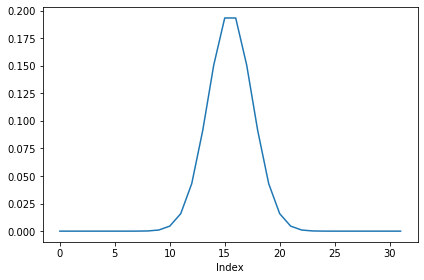

In [3]:
import scipy.signal

gaussian = scipy.signal.gaussian(M=32, std=2)
gaussian /= sum(gaussian)
plt.plot(gaussian)
decorate(xlabel='Index')

FFT

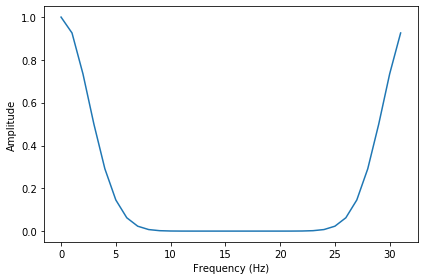

In [4]:
fft_gaussian = np.fft.fft(gaussian)
plt.plot(abs(fft_gaussian))
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

如果將負頻率向左滾動，則可以更清楚地看到它至少是近似高斯的。

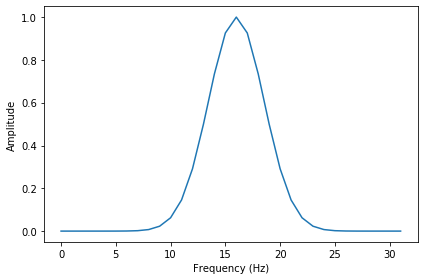

In [5]:
N = len(gaussian)
fft_rolled = np.roll(fft_gaussian, N//2)
plt.plot(abs(fft_rolled))
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

此函數並排繪製高斯窗口及其FFT。

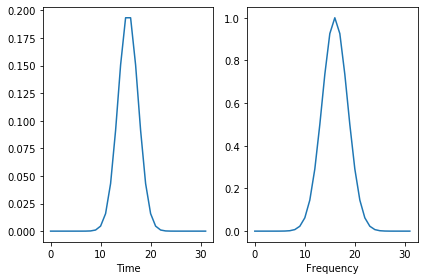

In [6]:
def plot_gaussian(std):
    M = 32
    gaussian = scipy.signal.gaussian(M=M, std=std)
    gaussian /= sum(gaussian)
    
    plt.subplot(1, 2, 1)
    plt.plot(gaussian)
    decorate(xlabel='Time')

    fft_gaussian = np.fft.fft(gaussian)
    fft_rolled = np.roll(fft_gaussian, M//2)
    
    plt.subplot(1, 2, 2)
    plt.plot(np.abs(fft_rolled))
    decorate(xlabel='Frequency')
    plt.show()

plot_gaussian(2)

現在，我們可以進行交互，以顯示隨著std變化而發生的情況。

In [7]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

slider = widgets.FloatSlider(min=0.1, max=10, value=2)
interact(plot_gaussian, std=slider);

interactive(children=(FloatSlider(value=2.0, description='std', max=10.0, min=0.1), Output()), _dom_classes=('…

隨著std的增加，高斯變寬，FFT變窄。
就連續數學而言，如果
𝑓（𝑥）= 𝑒−𝑎𝑥2
它是均值為0且標準偏差為1 /𝑎的高斯，其傅里葉變換為
𝐹（𝑘）= 𝜋𝑎⎯⎯⎯√𝑒−𝜋2𝑘2 /𝑎
是具有標準差𝑎/ 𝜋2的高斯。因此，𝑓和the的標準偏差之間存在反比關係。